In [2]:
from astropy.io import fits
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.colors import LogNorm
from numpy import pi, cos,sin
import os
import re
import urllib.request
D_003=132.2 # luminsity distance for z=0.03 this can also come from astropy
folderdata='/scratch/garzilli/data/'
folderobj = os.path.join(folderdata,'dr16/eboss/photoObj/301/')

MODE=1 # only primary
# MODE=2 # only secondary

In [3]:
import sys
import astroquery
print(astroquery.__path__)
from astroquery.simbad import Simbad 
from astroquery import sdss

['/home/astro/garzilli/local/lib/python3.7/site-packages/astroquery-0.4.2.dev6620-py3.7.egg/astroquery']


In [4]:
from astroquery import sdss

In [5]:
result_table = Simbad.query_object("Mrk5", wildcard=True)

In [6]:
print(result_table.dtype)
print(result_table['RA'])
ra = result_table['RA'].data[0]
dec = result_table['DEC'].data[0]
print(ra)
ra_degree=ra.split(' ')[0]  + '°' + ra.split(' ')[1] + '′' + ra.split(' ')[2] + '″'
print(ra_degree)
print(Angle(ra_degree).arcmin)
print(dec)
dec_degree=dec.split(' ')[0]  + '°' + dec.split(' ')[1] + '′' + dec.split(' ')[2] + '″'
print(dec_degree)
print(Angle(dec_degree).arcmin)


[('MAIN_ID', 'O'), ('RA', '<U13'), ('DEC', '<U13'), ('RA_PREC', '<i2'), ('DEC_PREC', '<i2'), ('COO_ERR_MAJA', '<f4'), ('COO_ERR_MINA', '<f4'), ('COO_ERR_ANGLE', '<i2'), ('COO_QUAL', '<U1'), ('COO_WAVELENGTH', '<U1'), ('COO_BIBCODE', 'O')]
    RA    
 "h:m:s"  
----------
06 42 15.9
06 42 15.9
06°42′15.9″
402.265
+75 37 40
+75°37′40″
4537.666666666666


In [41]:
co = SkyCoord(ra_degree+' '+dec_degree)
print(co)
#co = SkyCoord(Angle(ra_degree).degree,Angle(dec_degree).degree, unit='deg')
#print(co)
co = SkyCoord('0h8m05.63s +14d50m23.3s')
radius = Angle(2, unit='arcmin')


result = sdss.SDSS.query_region(co, radius=radius,data_release=16, photoobj_fields=['run', 'rerun','camcol','field','ra','dec','petroFlux_u', 'petroFlux_g', 'petroFlux_r','petroFlux_i','petroFlux_z'])
print(result[:5])
print(len(result))
query={}
for k in result.keys():
    query[k]=result[k].data

result={}
for i in range(len(query['ra'])):
    table=sdss.SDSS.query_photoobj(run=query['run'][i], rerun=query['rerun'][i],field=query['field'][i],camcol=query['camcol'][i],
                                   data_release=16,fields=['ra','dec','petroFlux_u', 'petroFlux_g', 'petroFlux_r','petroFlux_i','petroFlux_z'])
    for k in table.keys():
        try:
            result[k]=np.append(result[k],table[k].data)
        except KeyError:
            result[k]=table[k].data
    
print(len(result['ra']))
    

<SkyCoord (ICRS): (ra, dec) in deg
    (6.70441667, 75.62777778)>
run  rerun camcol field ... petroFlux_g petroFlux_r petroFlux_i petroFlux_z
---- ----- ------ ----- ... ----------- ----------- ----------- -----------
1011   301      3    44 ...   0.8639656    2.286973    5.941719    12.72852
1043   301      3    14 ...         0.0         0.0         0.0         0.0
1739   301      3   315 ...    21.69147    80.83463    204.8615    334.1561
1739   301      3   315 ...   0.2869134    2.113049    1.920192    1.070827
1739   301      3   315 ...      81.156    156.9841    244.9685    1309.462
530
515429


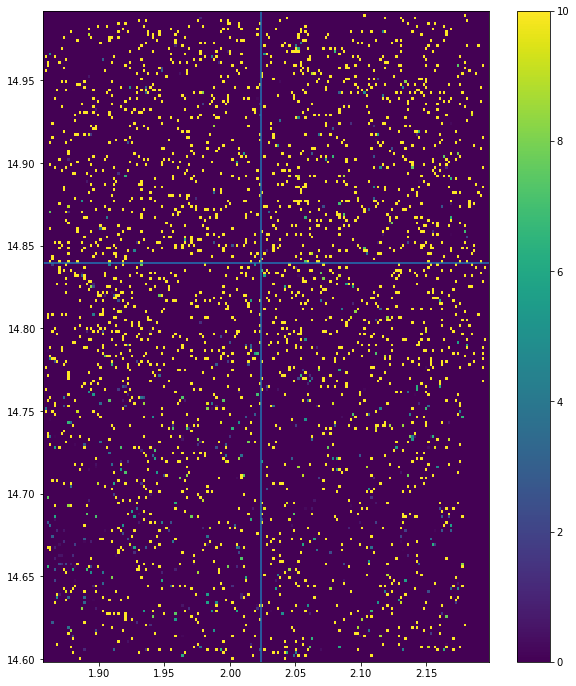

In [42]:
dec_min=min(result['dec'])
dec_max=max(result['dec'])
ra_min=min(result['ra'])
ra_max=max(result['ra'])

pix_size = 1/60./10. # say, one arcmin
dec_mid  = (dec_min + dec_max) / 2.
Nra      = int((ra_max - ra_min) * cos(dec_mid * pi / 180.) / pix_size)
Ndec     = int((dec_max - dec_min) / pix_size)
ra_b     = np.linspace(ra_min, ra_max, Nra)
dec_b    = np.linspace(dec_min, dec_max, Ndec)


fig = plt.figure(figsize=(10.,10.*(Ndec / Nra)))
plt.hist2d(result['ra'], result['dec'], bins=([ra_b, dec_b]), weights=result['petroFlux_u'], vmax=10, vmin=0)
plt.colorbar()
plt.axhline(Angle('+14d50m23.3s').deg)# dec
plt.axvline(Angle('0h8m05.63s').deg)# ra

In [46]:
filters={'u':3543, 'g':4770, 'r': 6231,'i':7625,'z':9134}

# Wavelength (Angstroms)
# Ultraviolet (u) 3543
# Green (g) 4770
# Red (r) 6231
# Near Infrared (i) 7625
# Infrared (z) 9134

[3543 4770 6231 7625 9134]
[ 41.21784 207.3633  408.8923  534.051   622.0323 ]


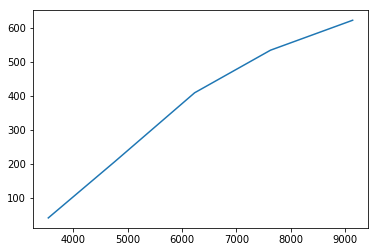

In [54]:
plt.figure()
index = 15
label=['u','g','r','i','z']
x = np.array([filters[i] for i in label])
y = np.array([result['petroFlux_'+i][index] for i in label])
plt.plot(x, y)
print(x)
print(y)

In [56]:
len(np.where(result['petroFlux_u']>0)[0])

394270